In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python

clase 24/10/2019

#### Docentes:  Dra. Laura M. Vargas - Dra. Valeria S. Rulloni
* Ayudantes: Sebastián Palacio- Axel Aguerreberry 
* Colaboradoras: Dra. Claudia Egea - Dra. Ana Carolina Maldonado

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import PIL

from PIL import Image, ImageOps

### Trabajo Práctico 1:

> **Ejercicio 1**

Realice y grafique una imagen con una cruz negra y fondo blanco.

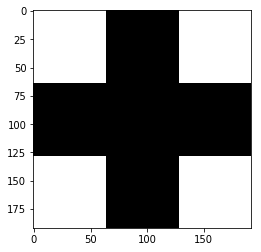

In [6]:
cruz = np.ones((192, 192))
cruz[:,64:129] = 0
cruz[64:129,:] = 0

plt.imshow(cruz, cmap='gray')
plt.show()

> **Ejercicio 2**

Realice y grafique una imagen con una cruz blanca y fondo negro (negativo de la primera).

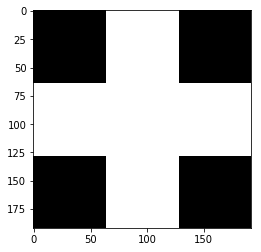

In [7]:
plt.imshow(1 - cruz, cmap='gray')

> **Ejercicio 3**

Realice y grafique, una imagen con cuatro bandas horizontales de intensidad homogénea decreciente de  1 a 0 de arriba abajo.

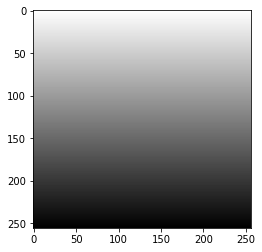

In [35]:
arr_image = np.empty((256, 256), 'uint8')

c = np.arange(256)
for i in c:
    arr_image[i, :] = 255 - c[i]

plt.imshow(arr_image, cmap="gray")
plt.show()

> **Ejercicio 4**

Construir y graficar una imagen 128x128  dividida en cuatro cuadrados de colores: rojo, azul, amarillo y uno a elección.

(128, 128, 3)


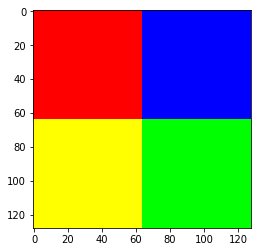

In [18]:
image = np.zeros((128, 128, 3), 'uint8')

image[:64, :64, 0] = 255  # Sector Rojo

image[:64, 64:, 2] = 255  # Sector Azul

image[64:, :64, 1] = 255  # Sector Amarillo
image[64:, :64:, 0] = 255  # Sector Amarillo

image[64:, 64:, 1] = 255  # Sector Verde

plt.imshow(image)
plt.show()

> **Ejercicio 5**

Abrir una imagen guardada en un archivo, convertirla en Imagen monocroma, y graficar ambas imágenes a la par, colocarle título a ambas.

Text(0.5,1,'Messi Monocromo')

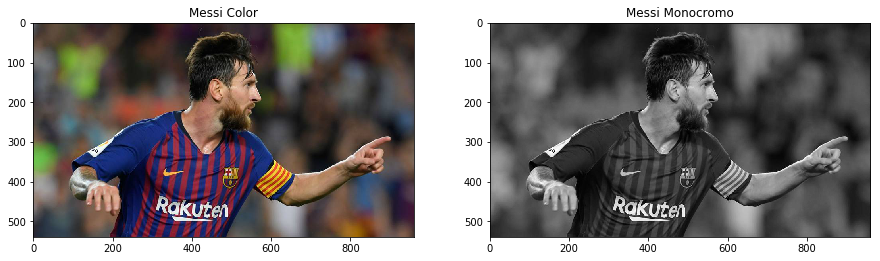

In [47]:
im = Image.open("./messi.jpg")
im_gray = im.convert(mode='L')

im_array = np.asarray(im)
im_gray_array = np.asarray(im_gray)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)

axs[0].imshow(im_array)
axs[0].set_title("Messi Color")

axs[1].imshow(im_gray_array, cmap="gray")
axs[1].set_title("Messi Monocromo")

> **Ejercicio 6** 

Construir y graficar una imagen a color que mezcle una imagen con paisaje a la que se le superponga una persona de otra imagen.

### Uso de ROI en OpenCV

In [48]:
img = cv2.imread('gato.jpg')  # Abrimos la imagen
print(img.shape)  # Dimensiones de la image

# Visualización:
cv2.imshow('image', img)
cv2.waitKey() 
cv2.destroyAllWindows()
print('Es muy grande la imagen para visualizarla completa ')

(3328, 1872, 3)
Es muy grande la imagen para visualizarla completa 


In [49]:
# Intentamos cambiar el tamaño  de la ventana donde se muestra
cv2.namedWindow('image2', cv2.WINDOW_NORMAL)
cv2.imshow('image2', img)
cv2.waitKey() 
cv2.destroyAllWindows()
print('Se ve la imagen completa pero no quedan proporcionales los ejes, le cambiaremos el tamaño a la ventana de visualización pero de manera proporcional, 800 pixeles de alto es un buen número')

Se ve la imagen completa pero no quedan proporcionales los ejes, le cambiaremos el tamaño a la ventana de visualización pero de manera proporcional, 800 pixeles de alto es un buen número


In [50]:
print('Alto de imagen original dividido 750 es = {} usaremos un redondeo entero como escala'.format(img.shape[0]/750))

Alto de imagen original dividido 750 es = 4.437333333333333 usaremos un redondeo entero como escala


In [51]:
escala = 4
tam1 = int(img.shape[0]/escala)
tam2 = int(img.shape[1]/escala)

print('Nuevas dimensiones para visualizar: {} {}; filas y columnas originales reducidas por {}'.format(tam1, tam2, escala))

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', tam2, tam1)  # tam2=# x's = #columnas y #tam1=# y's = #filas        
cv2.imshow('image', img)
cv2.waitKey() 
cv2.destroyAllWindows()

Nuevas dimensiones para visualizar: 832 468; filas y columnas originales reducidas por 4


#### Selección de ROI

In [52]:
# Ajustes del tamaño de la ventana:
cv2.namedWindow('delimite la ROI+ent+tecla', cv2.WINDOW_NORMAL)
cv2.resizeWindow('delimite la ROI+ent+tecla', tam2, tam1)

# Parámetros para el demarcado de la ROI
showCrosshair = False
fromCenter = True  # False

# Demarcado manual de la ROI
roi = cv2.selectROI('delimite la ROI+ent+tecla', img, fromCenter, showCrosshair)
cv2.waitKey() 
cv2.destroyAllWindows()

In [77]:
print('ROI: {}'.format(roi))
print('     (columna, fila, anchocol, anchofila)')

ROI: (600, 1797, 340, 258)
(columna, fila, anchocol, anchofila)


In [53]:
f1 = roi[1]
fu = roi[1] + roi[3]
c1 = roi[0]
cu = roi[0] + roi[2]
print(f1, fu, c1, cu)

recorte = img[f1:fu, c1:cu, :]
print(recorte.shape)
cv2.imshow('imagen recorte', recorte)
cv2.waitKey() 
cv2.destroyAllWindows()

1791 2186 526 972
(395, 446, 3)


In [54]:
img2 = cv2.imread('paisaje.jpg')  # Abrimos la imagen
print(img2.shape)  # Dimensiones de la image

# Visualización:
cv2.imshow('image',img2)
cv2.waitKey() 
cv2.destroyAllWindows()

print('Es muy grande la imagen para visualizarla completa ')

(1872, 3328, 3)
Es muy grande la imagen para visualizarla completa 


In [55]:
print('Alto de imagen original dividido 750 es = {} usaremos un redondeo entero como escala'.format(img.shape[0]/750))

Alto de imagen original dividido 750 es = 4.437333333333333 usaremos un redondeo entero como escala


In [56]:
# Visualización de la imagen 'paisaje.jpg' escalada
escala = 3
tam1 = int(img2.shape[0]/escala)
tam2 = int(img2.shape[1]/escala)

print('Nuevas dimensiones para visualizar: {} {}; filas y columnas originales reducidas por {}'.format(tam1, tam2, escala))

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', tam2, tam1)  # tam2=# x's = #columnas y #tam1=# y's = #filas        
cv2.imshow('image', img2)
cv2.waitKey() 
cv2.destroyAllWindows()

Nuevas dimensiones para visualizar: 624 1109; filas y columnas originales reducidas por 3


#### Primera aproximación de superposición, considerando la ubicación pero no el tamaño adaptado.

In [57]:
imagen_nueva = img2.copy()

print(img.shape)
print(recorte.shape)
print('Des-comentar la línea que sigue dará error pues el recorte se sale de rango en la imagen del paisaje')
# imagen_nueva[f1:fu,c1:cu,:]=recorte

(3328, 1872, 3)
(395, 446, 3)
Des-comentar la línea que sigue dará error pues el recorte se sale de rango en la imagen del paisaje


como se sale de rango, restamos ubicamos el recorte F=400 filas hacia arriba (C=0, no se mueven las columnas, si queremos se modifican ambos pero con cuidado de no salirse de la imagen) y graficamos 

In [58]:
F = 700
C = 40
imagen_nueva = img2.copy()  # Paisaje nuevo
imagen_nueva[(f1-F):(fu-F), (c1-C):(cu-C),:] = recorte  # Sobre-escribimos el recorte sobre el paisaje 

# Graficamos con la misma escala para paisaje original
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', tam2, tam1)  # tam2=# x's = #columnas y #tam1=# y's = #filas        
cv2.imshow('image', imagen_nueva)
cv2.waitKey() 
cv2.destroyAllWindows()

> **Ejercicio 7**

Cargar una imagen monocroma y realizar por separado las siguientes modificaciones :  Aclararla, Oscurecerla y Obtener el negativo.

Text(0.5,1,'Imagen Oscurecida')

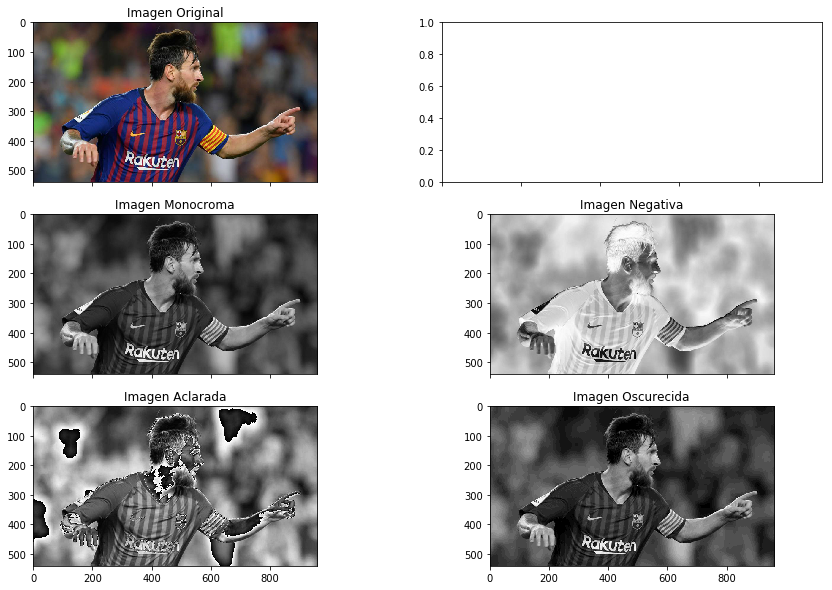

In [84]:
im = Image.open('./messi.jpg')
im_gray = im.convert(mode='L')
im_inverted = ImageOps.invert(im_gray)
im_clarified = np.asarray(im_gray) * 2
im_darkened = np.asarray(im_gray) / 10


fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)

axs[0][0].imshow(np.asarray(im), cmap="gray")
axs[0][0].set_title("Imagen Original")

axs[1][0].imshow(np.asarray(im_gray), cmap="gray")
axs[1][0].set_title("Imagen Monocroma")

axs[1][1].imshow(np.asarray(im_inverted), cmap="gray")
axs[1][1].set_title("Imagen Negativa")

axs[2][0].imshow(im_clarified.astype(np.uint8), cmap="gray")
axs[2][0].set_title("Imagen Aclarada")

axs[2][1].imshow(im_darkened.astype(np.uint8), cmap="gray")
axs[2][1].set_title("Imagen Oscurecida")

> **Ejercicio 8**

Obtener el valor de gris más repetido en cada imagen.

> **Ejercicio 9**

Aplicar una máscara  de suavizado de 5x5 a la componente roja de una imagen a elección, un filtro de bordes a la componente verde componer una imagen a color donde se reemplace las componentes rojas y verdes modificadas.

> **Ejercicio 10**

Binarice una imagen a elección buscando demarcar uno o varios objetos en esta (puede ser eligiendo un umbral a partir del histograma de una imagen monocroma).

Al resultado aplicarle 2 o 3 filtros morfológicos en el orden que crea adecuado para mejorar la segmentación con elemento  estructurante creado por usted, según crea adecuado para el problema (justifique).

> **Ejercicio 11**

Mostrar en una misma ventana, la imagen original, la binaria y la resultante de aplicarle los filtros.

Comente si tuvo buenos resultados.

> **Ejercicio 12**

Encuentre bordes o el contorno del objeto u objetos en la imagen binaria utilizando operaciones morfológicas.

> **Ejercicio 13**

Cargar una imagen a color (a elección), que a su criterio tenga entre 2 y 7 clases en ella:
- a) Explique coloquialmente la cantidad y el criterio visual que utilizó para identificarlas.

- b) Agregue una o dos características (capas, bandas, etc, pueden ser bordes de alguna componente) más a la imagen que considere puedan ser relevantes para la clasificación. 

- c) Construya una muestra de entrenamiento de la imagen utilizando todas las características.

- d) Realice un análisis exploratorio con gráficos de la muestra de entrenamiento discriminando con diferente color cada clase.

- e) Clasifíquela utilizando la muestra de entrenamiento y  K-NN  (k vecinos más cercanos). O con el método que guste.

- f) Generar una máscara o elemento estructural, y realice con éste una mejora de la clasificación obtenida en el ejercicio anterior utilizando un filtro de moda.  
     Mirando el resultado final decida si considera que la clasificación fue buena y si la cantidad de clases elegida fue la adecuada.